In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')
import sklearn
import mlxtend

In [2]:
df = pd.read_csv("placement_data.csv")

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(3)

,cgpa,resume_score,placed
459,3.29,3.16,0
842,8.11,4.01,1
652,2.88,1.09,1


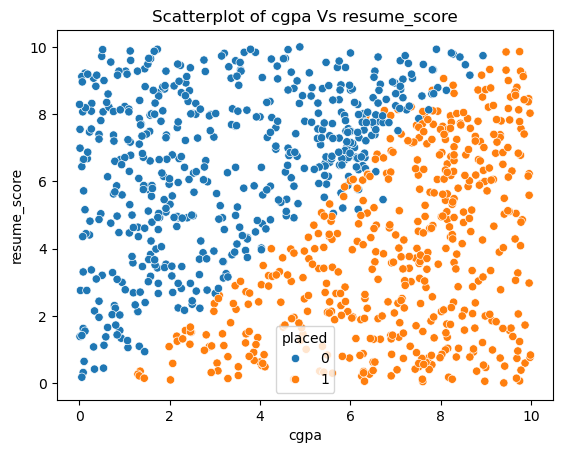

In [5]:
sns.scatterplot(data = df, x = 'cgpa', y = 'resume_score', hue='placed')
plt.title("Scatterplot of cgpa Vs resume_score")
plt.show()

In [6]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
from sklearn.linear_model import  Perceptron

In [9]:
P = Perceptron()

In [10]:
P.fit(X_train,y_train)

Perceptron()

In [11]:
P.coef_

array([[ 81.72, -77.35]])

In [12]:
P.intercept_

array([-72.])

In [13]:
from mlxtend.plotting import plot_decision_regions

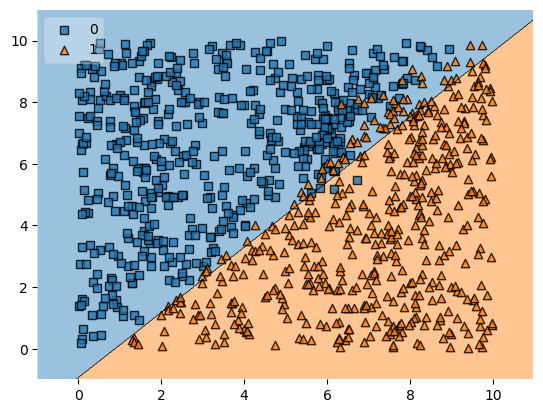

In [14]:
plot_decision_regions(X.values, y.values,clf = P, legend=2)
plt.show()

In [15]:
y_pred  = pd.Series(P.predict(X_test))
y_pred

0     0
1     1
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64

In [16]:
y_test

521    0
737    1
740    0
660    0
411    0
      ..
436    1
764    1
88     1
63     1
826    1
Name: placed, Length: 100, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
Confusion_matrix = confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[42,  0],
       [ 8, 50]], dtype=int64)

In [19]:
from mlxtend.plotting import plot_confusion_matrix

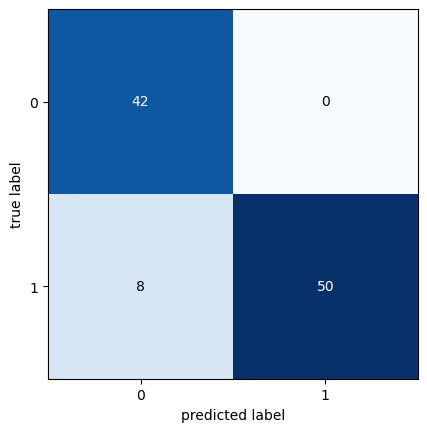

In [20]:
plot_confusion_matrix(Confusion_matrix)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9310344827586207

#### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
D = DecisionTreeClassifier()

In [25]:
D.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = D.predict(X_test)

In [27]:
Confusion_matrix = confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[41,  1],
       [ 3, 55]], dtype=int64)

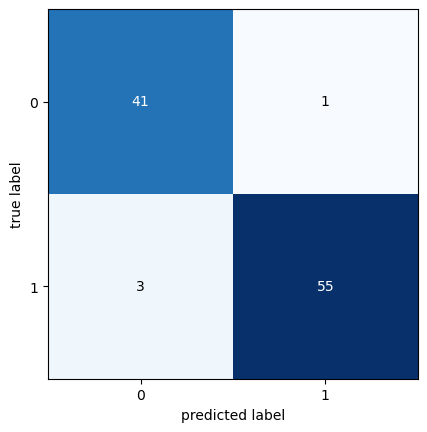

In [28]:
plot_confusion_matrix(Confusion_matrix)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9622331691297208

## Trying for XOR data

In [31]:
x1 = np.array([])
x2 = np.array([])
for i in range(1000):
    random_1 = np.round(np.random.randint(0,100))
    random_2 = np.round(np.random.randint(0,30))
    x1 = np.append(x1,random_1)
    x2 = np.append(x2,random_2)
output = np.array([])
for i in range(1000):
    if x1[i]%2 ==0 and x2[i]%2 ==0:
        output = np.append(output,0)
    else:
        output = np.append(output,1)
df_xor = pd.DataFrame([])
df_xor['x1'] = x1
df_xor['x2'] = x2
df_xor['output'] = output
df_xor.head(3)

,x1,x2,output
0,59.0,4.0,1.0
1,1.0,21.0,1.0
2,80.0,1.0,1.0


In [32]:
df_xor.shape

(1000, 3)

In [33]:
df_xor = df_xor.astype(int)

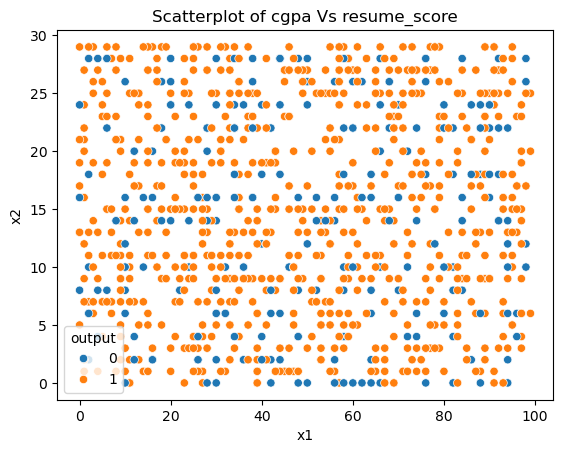

In [34]:
sns.scatterplot(data = df_xor, x = 'x1', y = 'x2', hue='output')
plt.title("Scatterplot of cgpa Vs resume_score")
plt.show()

In [35]:
X = df_xor.iloc[:,:2]
y = df_xor.iloc[:,-1]

In [36]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
P.fit(X_train,y_train)

Perceptron()

In [38]:
P.coef_

array([[16., 50.]])

In [39]:
P.intercept_

array([-29.])

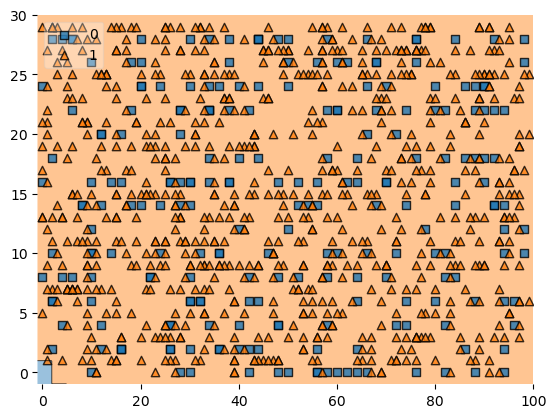

In [40]:
plot_decision_regions(X.values, y.values,clf = P, legend=2)
plt.show()

In [41]:
y_pred  = pd.Series(P.predict(X_test))
y_pred

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int32

In [42]:
y_test

521    1
737    0
740    0
660    1
411    1
      ..
436    1
764    1
88     0
63     1
826    1
Name: output, Length: 100, dtype: int32

In [43]:
Confusion_matrix = confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[ 0, 26],
       [ 0, 74]], dtype=int64)

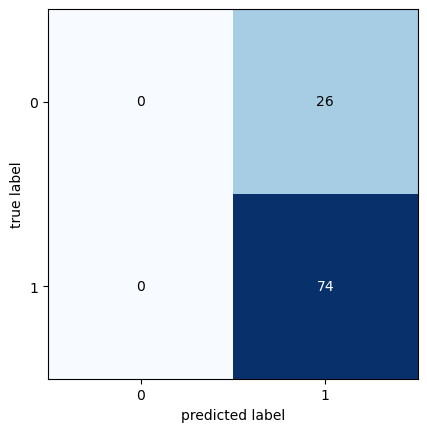

In [44]:
plot_confusion_matrix(Confusion_matrix)
plt.show()

### AUC plotting

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5